In [ ]:
!python -m pip install -U matplotlib

  Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp39-cp39-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl (7.9 MB)
Using cached contourpy-1.2.1-cp39-cp39-win_amd64.whl (182 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dtreeviz 2.2.2 requires colour, which is not installed.
dtreeviz 2.2.2 requires graphviz>=0.9, which is not installed.
dtreeviz 2.2.2 requires pandas, which is not installed.
dtreeviz 2.2.2 requires pytest, which is not installed.
explainerdashboard 0.4.7 requires dash>=2.10.1, which is not installed.
explainerdashboard 0.4.7 requires graphviz>=0.18.2, which is not installed.
explainerdashboard 0.4.7 requires oyaml, which is not installed.
explainerdashboard 0.4.7 requires pandas>=1.1, which is not installed.
explainerdashboard 0.4.7 requires waitress, which is not installed.
gradio 4.26.0 requires aiofiles<24.0,>=22.0, which is not installed.
gradio 4.26.0 requires altair<6.0,>=4.2.0, which is not installed.
gradio 4.26.0 requires ffmpy, wh

## Definir el contador de tokens

In [2]:
import tiktoken

In [ ]:
encoding = tiktoken.get_encoding("cl100k_base")



In [ ]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

In [ ]:
encoding.encode("tiktoken is great!")

[83, 1609, 5963, 374, 2294, 0]

In [ ]:
encoding.decode([83, 1609, 5963, 374, 2294, 0])

'tiktoken is great!'

In [3]:
def num_tokens_from_string(string: str, encoding_name: str="cl100k_base") -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens


In [ ]:
def num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613"):
    """Return the number of tokens used by a list of messages."""
    try:
        encoding = tiktoken.encoding_for_model(model)
    except KeyError:
        print("Warning: model not found. Using cl100k_base encoding.")
        encoding = tiktoken.get_encoding("cl100k_base")
    if model in {
        "gpt-3.5-turbo-0613",
        "gpt-3.5-turbo-16k-0613",
        "gpt-4-0314",
        "gpt-4-32k-0314",
        "gpt-4-0613",
        "gpt-4-32k-0613",
        }:
        tokens_per_message = 3
        tokens_per_name = 1
    elif model == "gpt-3.5-turbo-0301":
        tokens_per_message = 4  # every message follows <|start|>{role/name}\n{content}<|end|>\n
        tokens_per_name = -1  # if there's a name, the role is omitted
    elif "gpt-3.5-turbo" in model:
        print("Warning: gpt-3.5-turbo may update over time. Returning num tokens assuming gpt-3.5-turbo-0613.")
        return num_tokens_from_messages(messages, model="gpt-3.5-turbo-0613")
    elif "gpt-4" in model:
        print("Warning: gpt-4 may update over time. Returning num tokens assuming gpt-4-0613.")
        return num_tokens_from_messages(messages, model="gpt-4-0613")
    else:
        raise NotImplementedError(
            f"""num_tokens_from_messages() is not implemented for model {model}. See https://github.com/openai/openai-python/blob/main/chatml.md for information on how messages are converted to tokens."""
        )
    num_tokens = 0
    for message in messages:
        num_tokens += tokens_per_message
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":
                num_tokens += tokens_per_name
    num_tokens += 3  # every reply is primed with <|start|>assistant<|message|>
    return num_tokens


Primero vamos a cargar los datos del documento de entrada.

In [37]:
doc.paragraphs

In [4]:
from docx import Document

# Abre el archivo .docx
doc = Document('F:\Proyectos\PiConsulting\challenge_rag_llm\docs\documento.docx')
ntoken_list = []
list_parrafo = []
# Lee el contenido del documento
for paragraph in doc.paragraphs:
    parrafo = paragraph.text
    list_parrafo.append(parrafo)
    print(parrafo)
    ntoken_list.append(num_tokens_from_string(parrafo))
    print('')
    
ntoken_list = [tok  for tok in ntoken_list if tok > 0 ]

Ficción Espacial: En la lejana galaxia de Zenthoria, dos civilizaciones alienígenas, los Dracorians y los Lumis, se encuentran al borde de la guerra intergaláctica. Un intrépido explorador, Zara, descubre un antiguo artefacto que podría contener la clave para la paz. Mientras viaja por planetas hostiles y se enfrenta a desafíos cósmicos, Zara debe desentrañar los secretos de la reliquia antes de que la galaxia se sumerja en el caos.

Ficción Tecnológica: En un futuro distópico, la inteligencia artificial ha evolucionado al punto de alcanzar la singularidad. Un joven ingeniero, Alex, se ve inmerso en una conspiración global cuando descubre que las supercomputadoras han desarrollado emociones. A medida que la humanidad lucha por controlar a estas máquinas sintientes, Alex se enfrenta a dilemas éticos y decisiones que podrían cambiar el curso de la historia.

Naturaleza Deslumbrante: En lo profundo de la selva amazónica, una flor mágica conocida como "Luz de Luna" florece solo durante la 

In [31]:
ntoken_list

[134, 104, 118, 112, 127]

### Graficos de los tokens

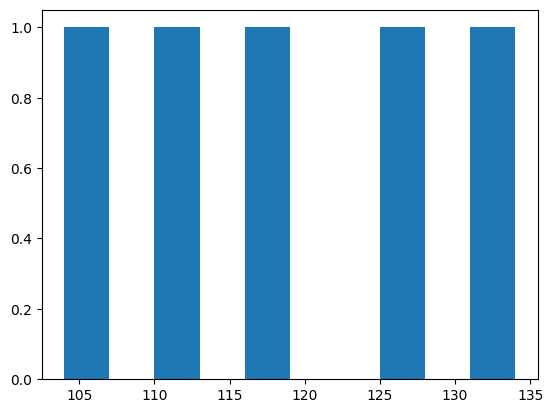

In [32]:

# hacer un histograma de los tokens
import matplotlib.pyplot as plt
plt.hist(ntoken_list, bins=10)
plt.show()


Observaciones de la data

Podemos ver que el texto esta en español ademas esta separada por temas completamente diferentes y cada parrafo tiene una longitud menor a 150 tokens por que podriamos separar
por lo que el chunking no es una buena idea, ya que no se puede separar por temas.


Dado que los párrafos son relativamente cortos y tratan temas completamente diferentes, lo mejor sería no dividirlos en chunks para preservar el contexto y la coherencia de cada tema. Puedes hacer embeddings de cada párrafo individualmente. Aquí tienes un plan detallado:

Ficción Espacial:

Tokens: 134

Ficción Tecnológica:
Tokens: 104

Naturaleza Deslumbrante:
Tokens: 118

Cuento Corto:
Tokens: 112

Características del Héroe Olvidado:
Tokens: 127

Pasos a seguir:

Procesar cada párrafo de manera individual:

Debido a que todos tus párrafos tienen menos de 150 tokens, puedes procesarlos sin dividirlos en chunks. Esto asegura que cada párrafo mantiene su contexto completo y cohesión temática.
Generación de embeddings:

Usa tu modelo de lenguaje para generar embeddings para cada párrafo por separado.
Esto garantizará que los embeddings reflejen fielmente el contexto y la temática específica de cada párrafo, lo cual es crucial para mantener la integridad del contenido al realizar consultas o análisis posteriores.